In [1]:
import json 
import pandas as pd  
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = ''
with open('/home/shaileshsarda/Desktop/customersdata.json', 'r') as f:
    for d in f:
        data += d + ','

data = data[:-1]
    
with open('/home/shaileshsarda/Desktop/customersdata1.json', 'w+') as f:
    f.write(data)
    
with open('/home/shaileshsarda/Desktop/customersdata1.json', 'r') as f:
    x = json.loads(f.read())
    for i in x:
        print(i)

{'fraudulent': False, 'customer': {'customerEmail': 'josephhoward@yahoo.com', 'customerPhone': '400-108-5415', 'customerDevice': 'yyeiaxpltf82440jnb3v', 'customerIPAddress': '8.129.104.40', 'customerBillingAddress': '5493 Jones Islands\nBrownside, CA 51896'}, 'orders': [{'orderId': 'vjbdvd', 'orderAmount': 18, 'orderState': 'pending', 'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}, {'orderId': 'yp6x27', 'orderAmount': 26, 'orderState': 'fulfilled', 'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896'}], 'paymentMethods': [{'paymentMethodId': 'wt07xm68b', 'paymentMethodRegistrationFailure': True, 'paymentMethodType': 'card', 'paymentMethodProvider': 'JCB 16 digit', 'paymentMethodIssuer': 'Citizens First Banks'}], 'transactions': [{'transactionId': 'a9lcj51r', 'orderId': 'vjbdvd', 'paymentMethodId': 'wt07xm68b', 'transactionAmount': 18, 'transactionFailed': False}, {'transactionId': 'y4wcv03i', 'orderId': 'yp6x27', 'paymentMethodId': 'wt07xm68b', 'transac

In [3]:
## Normalize data for key : transactions
orders_data = json_normalize(data = x, 
                            record_path =['transactions'],
                             meta =['fraudulent'])

orders_data.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False
2,nlghpa,41ug157xz,45,False,5mi94sfw,True
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True
4,bn44oh,y3xp697jx,43,True,a33145ss,True


In [4]:
## Normalize data for key : orders
normal_data = json_normalize(data = x,record_path =['orders'])
normal_data.head()

,orderAmount,orderId,orderShippingAddress,orderState
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled
3,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled
4,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled


In [5]:
## Merge the above both the tables
df_merge_col = pd.merge(orders_data, normal_data, on='orderId')
df_merge_col.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderShippingAddress,orderState
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,18,"5493 Jones Islands\nBrownside, CA 51896",pending
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled
4,bn44oh,y3xp697jx,43,True,a33145ss,True,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled


In [6]:
## Normalize data for key : paymentMethods
pay_data = json_normalize(data = x,record_path =['paymentMethods'])
pay_data.head()

,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card
1,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin
2,6krszxc05,Vertex Bancorp,VISA 16 digit,False,card
3,5z1szj2he,His Majesty Bank Corp.,Diners Club / Carte Blanche,False,card
4,m52tx8e1s,Vertex Bancorp,Mastercard,False,card


In [7]:
## Build final dataframe 
df = pd.merge(df_merge_col, pay_data, on='paymentMethodId')
df.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderShippingAddress,orderState,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,18,"5493 Jones Islands\nBrownside, CA 51896",pending,Citizens First Banks,JCB 16 digit,True,card
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,Citizens First Banks,JCB 16 digit,True,card
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,Bastion Banks,American Express,False,bitcoin
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,Bastion Banks,American Express,False,bitcoin
4,bn44oh,y3xp697jx,43,True,a33145ss,True,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,Solace Banks,VISA 16 digit,True,bitcoin


# Exploratory Data Analysis

In [8]:
## List out the all varibles
df.columns

Index(['orderId', 'paymentMethodId', 'transactionAmount', 'transactionFailed',
       'transactionId', 'fraudulent', 'orderAmount', 'orderShippingAddress',
       'orderState', 'paymentMethodIssuer', 'paymentMethodProvider',
       'paymentMethodRegistrationFailure', 'paymentMethodType'],
      dtype='object')

In [9]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 13 columns):
orderId                             623 non-null object
paymentMethodId                     623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null bool
transactionId                       623 non-null object
fraudulent                          623 non-null bool
orderAmount                         623 non-null int64
orderShippingAddress                623 non-null object
orderState                          623 non-null object
paymentMethodIssuer                 623 non-null object
paymentMethodProvider               623 non-null object
paymentMethodRegistrationFailure    623 non-null bool
paymentMethodType                   623 non-null object
dtypes: bool(3), int64(2), object(8)
memory usage: 55.4+ KB


In [10]:
## Check the misssing entries in the data set
df.isnull().sum() # There is zero missing value avaiable in the data

orderId                             0
paymentMethodId                     0
transactionAmount                   0
transactionFailed                   0
transactionId                       0
fraudulent                          0
orderAmount                         0
orderShippingAddress                0
orderState                          0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
dtype: int64

In [11]:
## To check the dataframe variable types
df.dtypes

orderId                             object
paymentMethodId                     object
transactionAmount                    int64
transactionFailed                     bool
transactionId                       object
fraudulent                            bool
orderAmount                          int64
orderShippingAddress                object
orderState                          object
paymentMethodIssuer                 object
paymentMethodProvider               object
paymentMethodRegistrationFailure      bool
paymentMethodType                   object
dtype: object

In [12]:
## Check out all the present state of orders
df['orderState'].unique()

array(['pending', 'fulfilled', 'failed'], dtype=object)

In [13]:
## Check out all the payment method types
df['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

In [14]:
## Target varible counts in False and True state
df['fraudulent'].value_counts()

False    366
True     257
Name: fraudulent, dtype: int64

# Summarization of Data

In [15]:
df.groupby('fraudulent').mean()

,transactionAmount,transactionFailed,orderAmount,paymentMethodRegistrationFailure
fraudulent,,,,
False,29.049180,0.295082,29.049180,0.122951
True,42.501946,0.233463,42.501946,0.143969


In [16]:
## To show the which payment type has the total count of fraud 
df.groupby('paymentMethodType',as_index=False).agg({"fraudulent":"sum"})

,paymentMethodType,fraudulent
0,apple pay,22.0
1,bitcoin,24.0
2,card,203.0
3,paypal,8.0


# Data Visualization

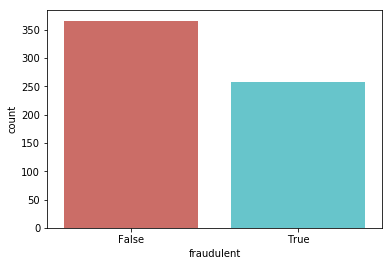

In [17]:
## Target value graph
sns.countplot(x='fraudulent', data=df, palette='hls')
plt.show()

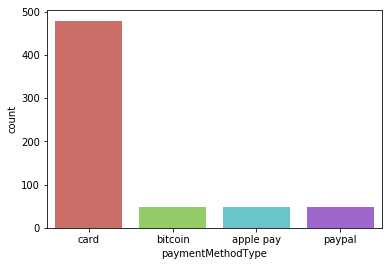

In [18]:
## Payment method type value graph
sns.countplot(x='paymentMethodType', data=df, palette='hls')
plt.show()

Text(0,0.5,'Fraud Happened')

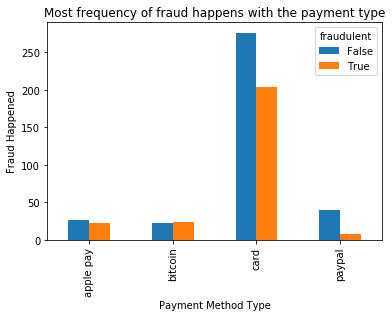

In [19]:
## Plot to show the fraud happned with the different payment method
%matplotlib inline
pd.crosstab(df.paymentMethodType,df.fraudulent).plot(kind='bar')
plt.title('Most frequency of fraud happens with the payment type')
plt.xlabel('Payment Method Type')
plt.ylabel('Fraud Happened')

Text(0,0.5,'Frequency of fraudlency')

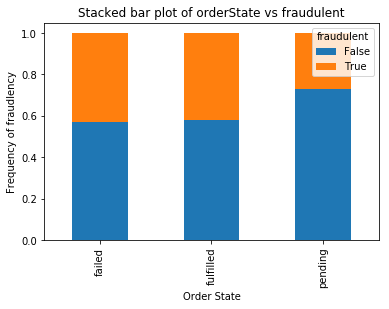

In [20]:
## Stacked plot for order state estimation for fradulency occured or not
table = pd.crosstab(df.orderState, df.fraudulent)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar plot of orderState vs fraudulent')
plt.xlabel('Order State')
plt.ylabel('Frequency of fraudlency')

In [21]:
## Remove the special characters from the dataframe
df1 = df.replace(r'[^a-zA-Z\d\_]+',' ',regex=True)
df1.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderShippingAddress,orderState,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,18,5493 Jones Islands Brownside CA 51896,pending,Citizens First Banks,JCB 16 digit,True,card
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,26,5493 Jones Islands Brownside CA 51896,fulfilled,Citizens First Banks,JCB 16 digit,True,card
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,45,898 Henry Ports New Keithview CA 95893 2497,fulfilled,Bastion Banks,American Express,False,bitcoin
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,23,356 Elizabeth Inlet Suite 120 Port Joshuabury ...,fulfilled,Bastion Banks,American Express,False,bitcoin
4,bn44oh,y3xp697jx,43,True,a33145ss,True,43,5093 Bryan Forks Joshuaton FM 01565 9801,fulfilled,Solace Banks,VISA 16 digit,True,bitcoin


In [22]:
## Check the shape of the data
df1.shape

(623, 13)

In [23]:
## Remove the unnecessery columns
df1 = df1.drop(["orderShippingAddress", "paymentMethodIssuer", "paymentMethodProvider"], axis=1)
df1.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,18,pending,True,card
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,26,fulfilled,True,card
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,45,fulfilled,False,bitcoin
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,23,fulfilled,False,bitcoin
4,bn44oh,y3xp697jx,43,True,a33145ss,True,43,fulfilled,True,bitcoin


In [24]:
categorical_feature_mask = df1.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df1.columns[categorical_feature_mask].tolist()

In [25]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
df1[categorical_cols].head()

,orderId,paymentMethodId,transactionId,orderState,paymentMethodType
0,413,215,184,2,2
1,458,215,598,1,2
2,314,29,94,1,1
3,404,29,210,1,1
4,148,224,182,1,1


In [26]:
df1.describe()

,orderId,paymentMethodId,transactionAmount,transactionId,orderAmount,orderState,paymentMethodType
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,237.232745,119.080257,34.598716,311.000000,34.598716,0.969502,1.844302
std,140.929467,68.249259,20.360247,179.988889,20.360247,0.413635,0.666007
min,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000,0.000000
25%,115.000000,59.500000,21.000000,155.500000,21.000000,1.000000,2.000000
50%,236.000000,121.000000,34.000000,311.000000,34.000000,1.000000,2.000000
75%,362.500000,180.500000,45.000000,466.500000,45.000000,1.000000,2.000000
max,477.000000,236.000000,353.000000,622.000000,353.000000,2.000000,3.000000


In [27]:
## Check the unique values
df2 = df1.apply(lambda x: x.nunique(), axis=0)
df2

orderId                             478
paymentMethodId                     237
transactionAmount                    67
transactionFailed                     2
transactionId                       623
fraudulent                            2
orderAmount                          67
orderState                            3
paymentMethodRegistrationFailure      2
paymentMethodType                     4
dtype: int64

In [28]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False) 
df1_ohe = ohe.fit_transform(df1)

In [29]:
df1_dict = df1.to_dict(orient='records')
df1_dict

[{'orderId': 413,
  'paymentMethodId': 215,
  'transactionAmount': 18,
  'transactionFailed': False,
  'transactionId': 184,
  'fraudulent': False,
  'orderAmount': 18,
  'orderState': 2,
  'paymentMethodRegistrationFailure': True,
  'paymentMethodType': 2},
 {'orderId': 458,
  'paymentMethodId': 215,
  'transactionAmount': 26,
  'transactionFailed': False,
  'transactionId': 598,
  'fraudulent': False,
  'orderAmount': 26,
  'orderState': 1,
  'paymentMethodRegistrationFailure': True,
  'paymentMethodType': 2},
 {'orderId': 314,
  'paymentMethodId': 29,
  'transactionAmount': 45,
  'transactionFailed': False,
  'transactionId': 94,
  'fraudulent': True,
  'orderAmount': 45,
  'orderState': 1,
  'paymentMethodRegistrationFailure': False,
  'paymentMethodType': 1},
 {'orderId': 404,
  'paymentMethodId': 29,
  'transactionAmount': 23,
  'transactionFailed': False,
  'transactionId': 210,
  'fraudulent': True,
  'orderAmount': 23,
  'orderState': 1,
  'paymentMethodRegistrationFailure': F

In [30]:
from sklearn.feature_extraction import DictVectorizer
dv_X = DictVectorizer(sparse=False) 
X_encoded = dv_X.fit_transform(df1_dict)
X_encoded
vocab = dv_X.vocabulary_
print(vocab)

{'orderId': 2, 'paymentMethodId': 4, 'transactionAmount': 7, 'transactionFailed': 8, 'transactionId': 9, 'fraudulent': 0, 'orderAmount': 1, 'orderState': 3, 'paymentMethodRegistrationFailure': 5, 'paymentMethodType': 6}


In [31]:
# Get dummies
df1 = pd.get_dummies(df1, prefix_sep='_', drop_first=True)
# df1.head() head
df1.head(6)

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType
0,413,215,18,False,184,False,18,2,True,2
1,458,215,26,False,598,False,26,1,True,2
2,314,29,45,False,94,True,45,1,False,1
3,404,29,23,False,210,True,23,1,False,1
4,148,224,43,True,182,True,43,1,True,1
5,457,67,33,False,448,False,33,0,False,2


In [32]:
df2 = df1
## Replace bool char with 1 and 0
d = {True: 1, False: 0}
df2['transactionFailed'] = df2['transactionFailed'].map(d)
df2['fraudulent'] = df2['fraudulent'].map(d)
df2['paymentMethodRegistrationFailure'] = df2['paymentMethodRegistrationFailure'].map(d)
df2.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType
0,413,215,18,0,184,0,18,2,1,2
1,458,215,26,0,598,0,26,1,1,2
2,314,29,45,0,94,1,45,1,0,1
3,404,29,23,0,210,1,23,1,0,1
4,148,224,43,1,182,1,43,1,1,1


In [33]:
# Seperate the dataset in independent and dependent variabels

X = df2[['orderId', 'paymentMethodId','transactionAmount','transactionFailed','transactionId','orderAmount',
        'orderState','paymentMethodRegistrationFailure','paymentMethodType']] 
y = df2[['fraudulent']]

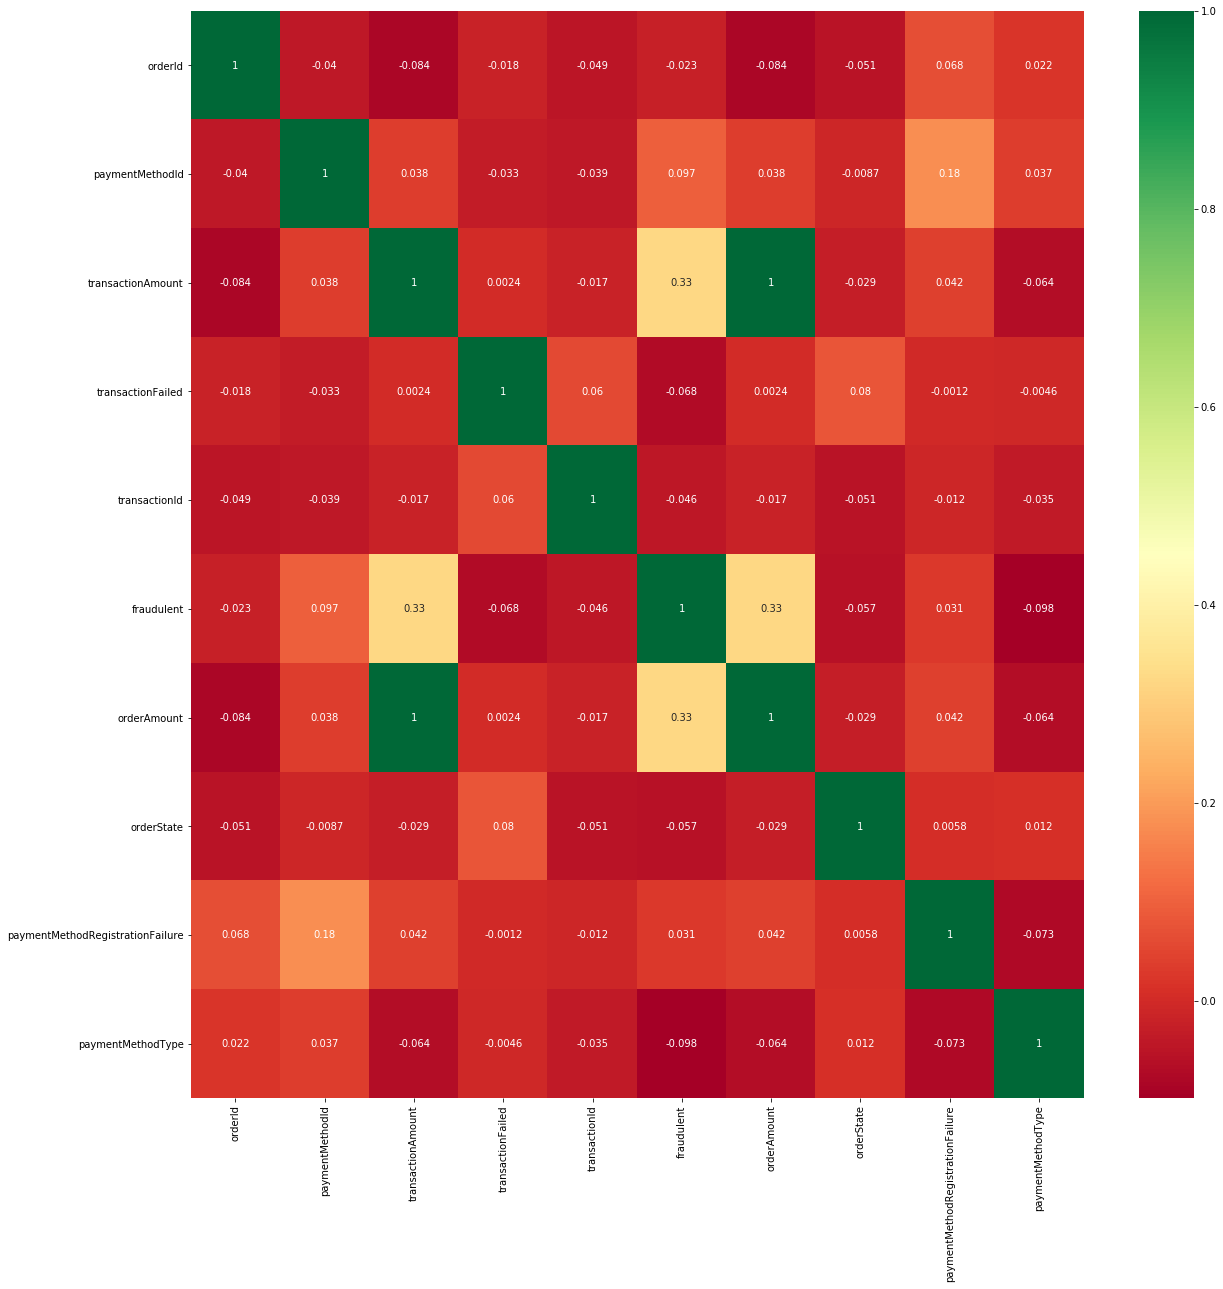

In [34]:
# To identify the correlations of each features in dataset
corr_matrix = df2.corr()
top_corr_features = corr_matrix.index

plt.figure(figsize=(20,20))

#plot heat map
heat_map_show =sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select  10 attributes
rfe = RFE(model, 9)
fit = rfe.fit(X, y)

/home/shaileshsarda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# summarize the selection of the attributes
print(fit.support_) # As we can see the all the variables are equally imortant so we will select all the variabels

[ True  True  True  True  True  True  True  True  True]


In [37]:
print("Feature Ranking: %s" % fit.ranking_)


Feature Ranking: [1 1 1 1 1 1 1 1 1]


In [38]:
## Splitting of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/home/shaileshsarda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
## Prediction
y_pred = logistic_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [41]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[91 21]
 [32 43]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) ## The Accuracy is quite good enough

             precision    recall  f1-score   support

          0       0.74      0.81      0.77       112
          1       0.67      0.57      0.62        75

avg / total       0.71      0.72      0.71       187



As I have calculated the correleation of the data variables and also used recursive feature elimination method to select the features and lables and that show the which variable are significant and not.
Here in this case all the selected variable in X dataframe are showing significancy with respect to fraud.